In [191]:
import pandas as pd
import numpy as np
from PIL import Image
from PIL import ImageOps
import PIL
import torch, torchvision
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [112]:
img_path = '/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/JPEGImages/'
csv_path = '/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/csv_labels/train.csv'

In [113]:
df_defect = pd.read_csv('/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/csv_labels/labels.csv', sep=" ")
df_train = pd.read_csv('/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/csv_labels/train.csv', sep=" ")
df_test = pd.read_csv('/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/csv_labels/test.csv', sep=" ")

In [266]:
class defectDataset(Dataset):
    def __init__(self, csv_path='/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/csv_labels/train.csv', img_path='/home/rliu/yolo2/v2_pytorch_yolo2/data/an_data/VOCdevkit/VOC2007/JPEGImages/', window_size=20, pad_size=50, transforms=None):
        """
        Args:
            csv_path (string): path to csv file
            transform: pytorch transforms for transforms and tensor conversion
        """
        self.data = pd.read_csv(csv_path, sep=" ")
        self.img_path = img_path
        self.transforms = transforms
        self.window_size = window_size
        self.pad_size = pad_size

    def __getitem__(self, index):
        labels = self.data.loc[index]
        single_image_label = int(labels['class']) # float
        x = labels['x']
        y = 1 - labels['y'] # origin of PIL image is top-left
        img_index = labels['image_index']
        img = Image.open(self.img_path + '%06.0f.jpg' % img_index)
        img = img.convert('L')
        img = torchvision.transforms.functional.resize(img, (300,300), interpolation=2)
        width, height = img.size
        img = ImageOps.expand(img, border=self.pad_size, fill=0)
        xmin = width * x - self.window_size/2 + self.pad_size
        ymin = height * y - self.window_size/2 + self.pad_size
        xmax = width * x + self.window_size/2 + self.pad_size
        ymax = height * y + self.window_size/2 + self.pad_size
        img_resized = img.crop((xmin, ymin, xmax, ymax))
        # Transform image to tensor
        if self.transforms is not None:
            img_as_tensor = self.transforms(img_resized)
        # Return image and the label
        return (img_as_tensor, single_image_label)

    def __len__(self):
        return len(self.data.index)
        

if __name__ == "__main__":
    transformations = transforms.Compose([transforms.ToTensor()])
#     defect_from_csv = \
#         defectDataset('../data/mnist_in_csv.csv', 28, 28, transformations)

In [267]:
data_transform = transforms.Compose([
#         transforms.RandomResizedCrop(200, scale=(1, 1), ratio=(1, 1)),
#         transforms.RandomHorizontalFlip(),
#         transforms.RandomRotation((-90,90)),
        transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                              std=[0.229, 0.224, 0.225])
    ])

In [282]:
defect_dataset = defectDataset(window_size = 50, transforms=data_transform)
dataset_loader = torch.utils.data.DataLoader(defect_dataset,
                                             batch_size=4, shuffle=True,
                                             num_workers=4)

In [283]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

GroundTruth:    pos   neg   nuc   neg
tensor([0, 1, 3, 1])


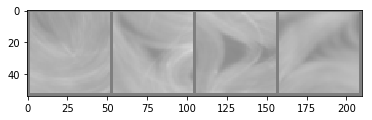

In [287]:
dataiter = iter(dataset_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
classes = ["pos","neg","pos_o","nuc","non"]
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
print(labels)

In [278]:
img_crop = torchvision.transforms.functional.resize(img, (300,300), interpolation=2)

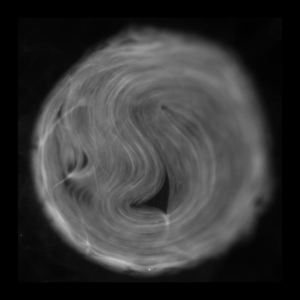

In [203]:
img_crop

In [265]:
window_size

100